In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
import allel

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## load samples

In [3]:
def load_groupfile(groupfile):
    group_ordered = []
    samples_queried = []
    haps_queried = []
    group2haps = defaultdict(list)
    hap2group = {}
    group2samples = defaultdict(list)
    with open(groupfile) as f:
        for line in f:
            sample, group = line.strip().split()
            if group not in group_ordered:
                group_ordered.append(group)  
            samples_queried.append(sample)
            group2samples[group].append(sample)
            haps_queried.append(f'{sample}_1')
            haps_queried.append(f'{sample}_2')
            group2haps[group].append(f'{sample}_1')
            group2haps[group].append(f'{sample}_2')
            hap2group[f'{sample}_1'] = group
            hap2group[f'{sample}_2'] = group
    return samples_queried, haps_queried, group_ordered, group2haps, hap2group, group2samples

In [4]:
groupfile = '500_sample2breed.tsv'

In [5]:
samples_queried, haps_queried, group_ordered, group2haps, hap2group, group2samples = load_groupfile(groupfile)

In [6]:
for group, ls in group2samples.items(): 
    print(group, len(ls))

Angus 100
Hereford 100
Charolais 100
Simmental 100
Limousin 100


## load vcf files

In [8]:
vcffile='./Chr6_37180233_37768454_500_beef_samples_SNP-INDEL.vcf.gz'

In [9]:
callset = allel.read_vcf(
    vcffile, 
    # region=f'{chrom}:{start}-{end}', 
    # samples=samples_queried, 
    fields=['samples', 'calldata/GT', 'variants/POS', 'variants/ALT', 'variants/REF'], 
    alt_number=1, 
    tabix='~/software/htslib-1.18/tabix'
)

## split genotype to haplotype

In [10]:
num_sites, num_inds, num_ploidy = callset['calldata/GT'].shape

In [11]:
ay_hap = np.empty((num_sites, num_inds * 2))

In [12]:
ay_hap[:, ::2] = callset['calldata/GT'][:, :, 0]
ay_hap[:, 1::2] = callset['calldata/GT'][:, :, 1]

## load haplotype array to dataframe

In [13]:
df_hap = pd.DataFrame(
    data=ay_hap, 
    index=callset['variants/POS'], 
    columns=haps_queried,
    dtype=int
)

In [14]:
df_hap

,AANAUSM000000000Z24_1,AANAUSM000000000Z24_2,AANAUSM000000QMUM13_1,AANAUSM000000QMUM13_2,AANAUSM000000SIRROY_1,AANAUSM000000SIRROY_2,AANAUSM000000TFAN90_1,AANAUSM000000TFAN90_2,AANAUSM000000WWRITO_1,AANAUSM000000WWRITO_2,...,LIMFRAM002424465830_1,LIMFRAM002424465830_2,LIMUSAM00NPM1718188_1,LIMUSAM00NPM1718188_2,LIMFRAM008739950260_1,LIMFRAM008739950260_2,LIMUSAM00NPM1458543_1,LIMUSAM00NPM1458543_2,UMCUSAM000000204599_1,UMCUSAM000000204599_2
37180381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37180411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37180475,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
37180599,1,1,0,0,0,1,1,0,1,0,...,0,0,1,1,1,0,0,0,1,0
37180860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37768116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37768154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37768213,1,1,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
37768214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4 breed

In [15]:
ls_haps_4breed = []
with open('./4_breed.txt', 'r') as f_in:
    for line in f_in:
        sample = line.strip()
        ls_haps_4breed.extend([f'{sample}_1', f'{sample}_2'])

In [16]:
len(ls_haps_4breed)

800

In [17]:
df_hap_4breed = df_hap[ls_haps_4breed]

In [18]:
df_hap_4breed

,CHAFRAF007931680136_1,CHAFRAF007931680136_2,CHAUSAM00000M434790_1,CHAUSAM00000M434790_2,CHAUSAM00000M411450_1,CHAUSAM00000M411450_2,CHAUSAM00000M319454_1,CHAUSAM00000M319454_2,CHACHEF120150617711_1,CHACHEF120150617711_2,...,UMCUSAM000000198530_1,UMCUSAM000000198530_2,HERCANM000C02755740_1,HERCANM000C02755740_2,HERAUSUBOW00000C017_1,HERAUSUBOW00000C017_2,UMCUSAM000000204590_1,UMCUSAM000000204590_2,HERUSAM000022957495_1,HERUSAM000022957495_2
37180381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37180411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37180475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37180599,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
37180860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37768116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37768154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37768213,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37768214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
ls_5_shared_snp = [37349373, 37362802, 37381106, 37381397, 37438248]

In [21]:
ls_all_0 = []
ls_all_1 = []

In [22]:
for hap in ls_haps_4breed:
    if df_hap_4breed.loc[ls_5_shared_snp,hap].sum() == 0:
        ls_all_0.append(hap)
    elif df_hap_4breed.loc[ls_5_shared_snp,hap].sum() == 5:
        ls_all_1.append(hap)

In [23]:
print(len(ls_all_0), len(ls_all_1))

425 315


In [24]:
freq_all_0 = df_hap_4breed[ls_all_0].sum(axis=1) / len(ls_all_0)

In [25]:
freq_all_1 = df_hap_4breed[ls_all_1].sum(axis=1) / len(ls_all_1)

In [27]:
df_freq_diff = pd.DataFrame(np.abs(freq_all_1 - freq_all_0), columns=['freq_diff'])

## 6:37349373-37438248

(37349373.0, 37438248.0)

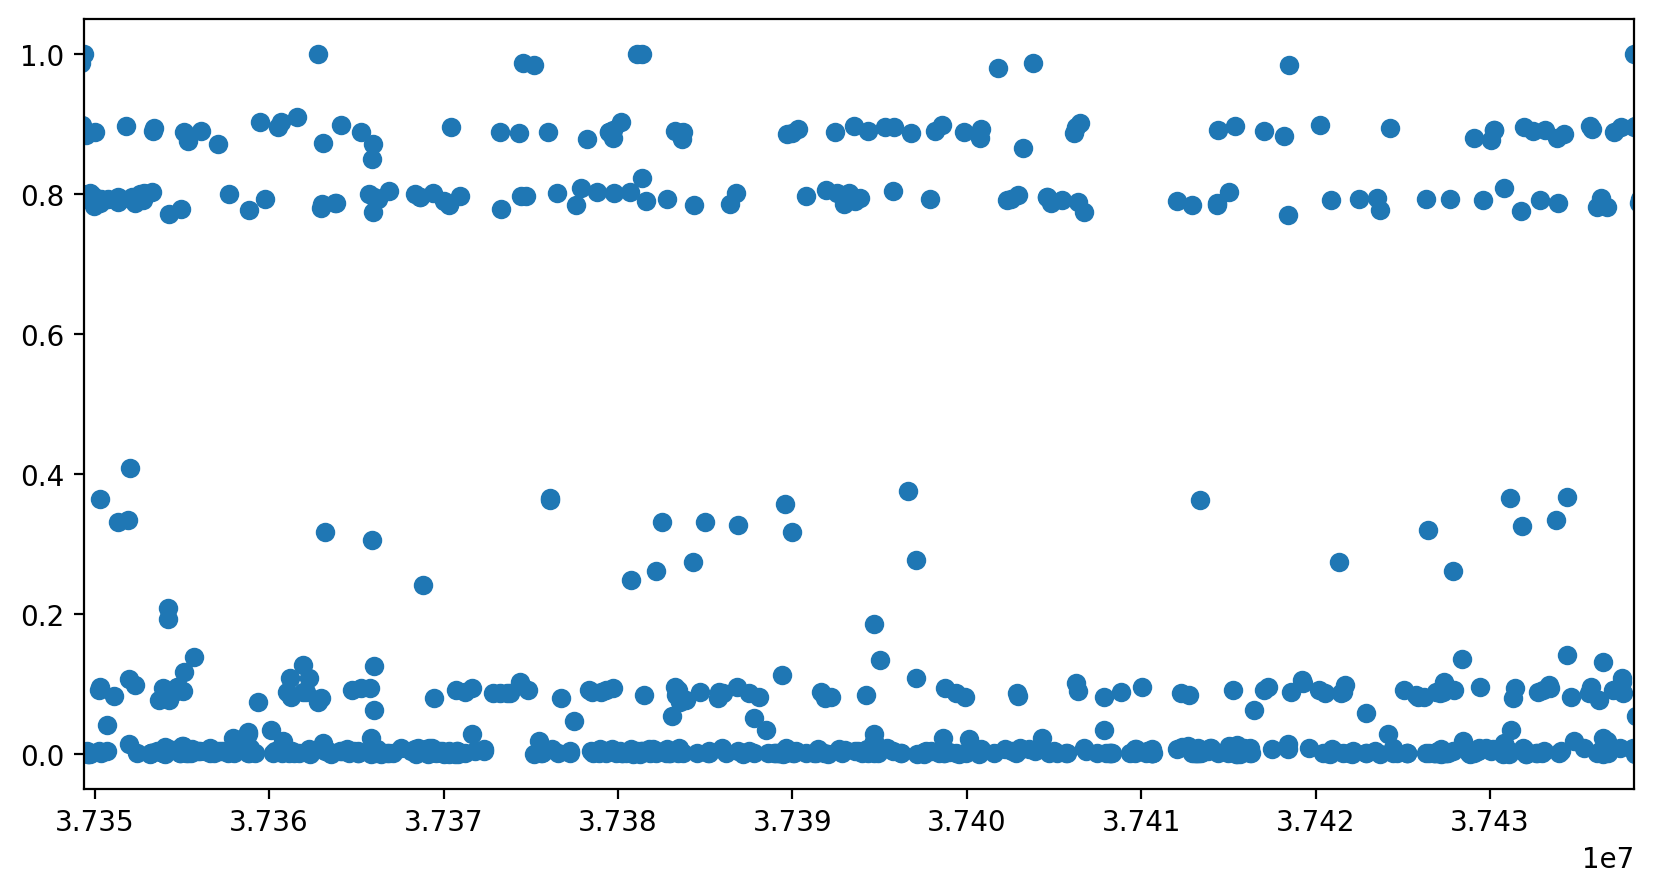

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_freq_diff.index, df_freq_diff['freq_diff'])
ax.set_xlim(left=37349373, right=37438248)

In [36]:
ls_all_1_0 = ls_all_1 + ls_all_0

In [37]:
len(ls_all_1_0)

740

In [38]:
ls_keep_site = [True if 37349373 <= pos <= 37438248 else False for pos in df_hap_4breed.index]

In [39]:
df_hap_region = df_hap_4breed.loc[ls_keep_site, ls_all_1_0]

In [40]:
df_hap_region

,UMCUSAU000000194787_1,CHAFRAF004461979043_1,CHAFRAM006502730908_1,UMCUSAU000000194789_1,UMCUSAU000000194789_2,SIMUSAM000001600900_2,CHAFRAM004240299352_1,CHAFRAM004240299352_2,SIMUSAM000001791082_1,SIMUSAM000001791082_2,...,HERUSAM000042982422_1,HERUSAM000042982422_2,HERRUSF000NSC39G186_1,HERRUSF000NSC39G186_2,HERUSAM000018705440_1,HERUSAM000018705440_2,UMCUSAM000000198542_2,HERNZLM000216000219_2,UMCUSAM000000204590_1,UMCUSAM000000204590_2
37349373,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
37349432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37349508,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
37349570,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
37349571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37437563,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
37437568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37437628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
37438222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### MAC > 0 

In [41]:
keep_mac = [
    True if 0 < ac < df_hap_region.shape[1] else False for ac in df_hap_region.sum(axis=1)
]

In [42]:
np.sum(keep_mac)

679

In [62]:
df_hap_region_mac = df_hap_region.loc[keep_mac, :]

In [63]:
df_hap_region_mac

,UMCUSAU000000194787_1,CHAFRAF004461979043_1,CHAFRAM006502730908_1,UMCUSAU000000194789_1,UMCUSAU000000194789_2,SIMUSAM000001600900_2,CHAFRAM004240299352_1,CHAFRAM004240299352_2,SIMUSAM000001791082_1,SIMUSAM000001791082_2,...,HERUSAM000042982422_1,HERUSAM000042982422_2,HERRUSF000NSC39G186_1,HERRUSF000NSC39G186_2,HERUSAM000018705440_1,HERUSAM000018705440_2,UMCUSAM000000198542_2,HERNZLM000216000219_2,UMCUSAM000000204590_1,UMCUSAM000000204590_2
37349373,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
37349432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37349508,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
37349570,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
37349571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37437563,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
37437568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37437628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
37438222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
freq_all_0 = df_hap_region_mac[ls_all_0].sum(axis=1) / df_hap_region_mac[ls_all_0].shape[1]
freq_all_1 = df_hap_region_mac[ls_all_1].sum(axis=1) / df_hap_region_mac[ls_all_1].shape[1]

In [73]:
df_freq_diff_mac = pd.DataFrame(np.abs(freq_all_0 - freq_all_1), columns=['freq_diff'])

In [74]:
df_freq_diff_mac

,freq_diff
37349373,1.000000
37349432,0.002353
37349508,0.884482
37349570,0.796825
37349571,0.004706
...,...
37437563,0.103529
37437568,0.108235
37437628,0.087059
37438222,0.009412


In [76]:
df_freq_diff_mac.reset_index(names='pos', inplace=True)

In [77]:
df_freq_diff_mac

,pos,freq_diff
0,37349373,1.000000
1,37349432,0.002353
2,37349508,0.884482
3,37349570,0.796825
4,37349571,0.004706
...,...,...
674,37437563,0.103529
675,37437568,0.108235
676,37437628,0.087059
677,37438222,0.009412


In [79]:
with open('vep_6_37349373_37438248/Chr6_37349373_37438248.vep.tsv', 'rt') as f_vep:
    for line in f_vep:
        if line.startswith('#Uploaded_variation'):
            ls_header = line.strip()[1:].split('\t')
            break

In [85]:
df_vep = pd.read_table(
    'vep_6_37349373_37438248/Chr6_37349373_37438248.vep.tsv',
    comment='#',
    header=None,
    names=ls_header,
    usecols=[
        'Uploaded_variation',
        'VARIANT_CLASS',
            ]
)

In [92]:
df_vep.drop_duplicates()

,pos,Uploaded_variation,VARIANT_CLASS
0,37349373,6_37349373,SNV
3,37349432,6_37349432,SNV
6,37349508,6_37349508,deletion
9,37349570,6_37349570,SNV
12,37349571,6_37349571,SNV
...,...,...,...
3511,37437563,6_37437563,SNV
3518,37437568,6_37437568,SNV
3525,37437628,6_37437628,SNV
3532,37438222,6_37438222,SNV


In [88]:
df_vep.insert(loc=0, column='pos', value=[int(loca.split('_')[1]) for loca in df_vep['Uploaded_variation']])

In [100]:
df_vep.drop_duplicates(inplace=True)

In [101]:
df_diff_class = pd.merge(left=df_freq_diff_mac, right=df_vep, on='pos')

In [102]:
df_diff_class

,pos,freq_diff,Uploaded_variation,VARIANT_CLASS
0,37349373,1.000000,6_37349373,SNV
1,37349432,0.002353,6_37349432,SNV
2,37349508,0.884482,6_37349508,deletion
3,37349570,0.796825,6_37349570,SNV
4,37349571,0.004706,6_37349571,SNV
...,...,...,...,...
673,37437563,0.103529,6_37437563,SNV
674,37437568,0.108235,6_37437568,SNV
675,37437628,0.087059,6_37437628,SNV
676,37438222,0.009412,6_37438222,SNV


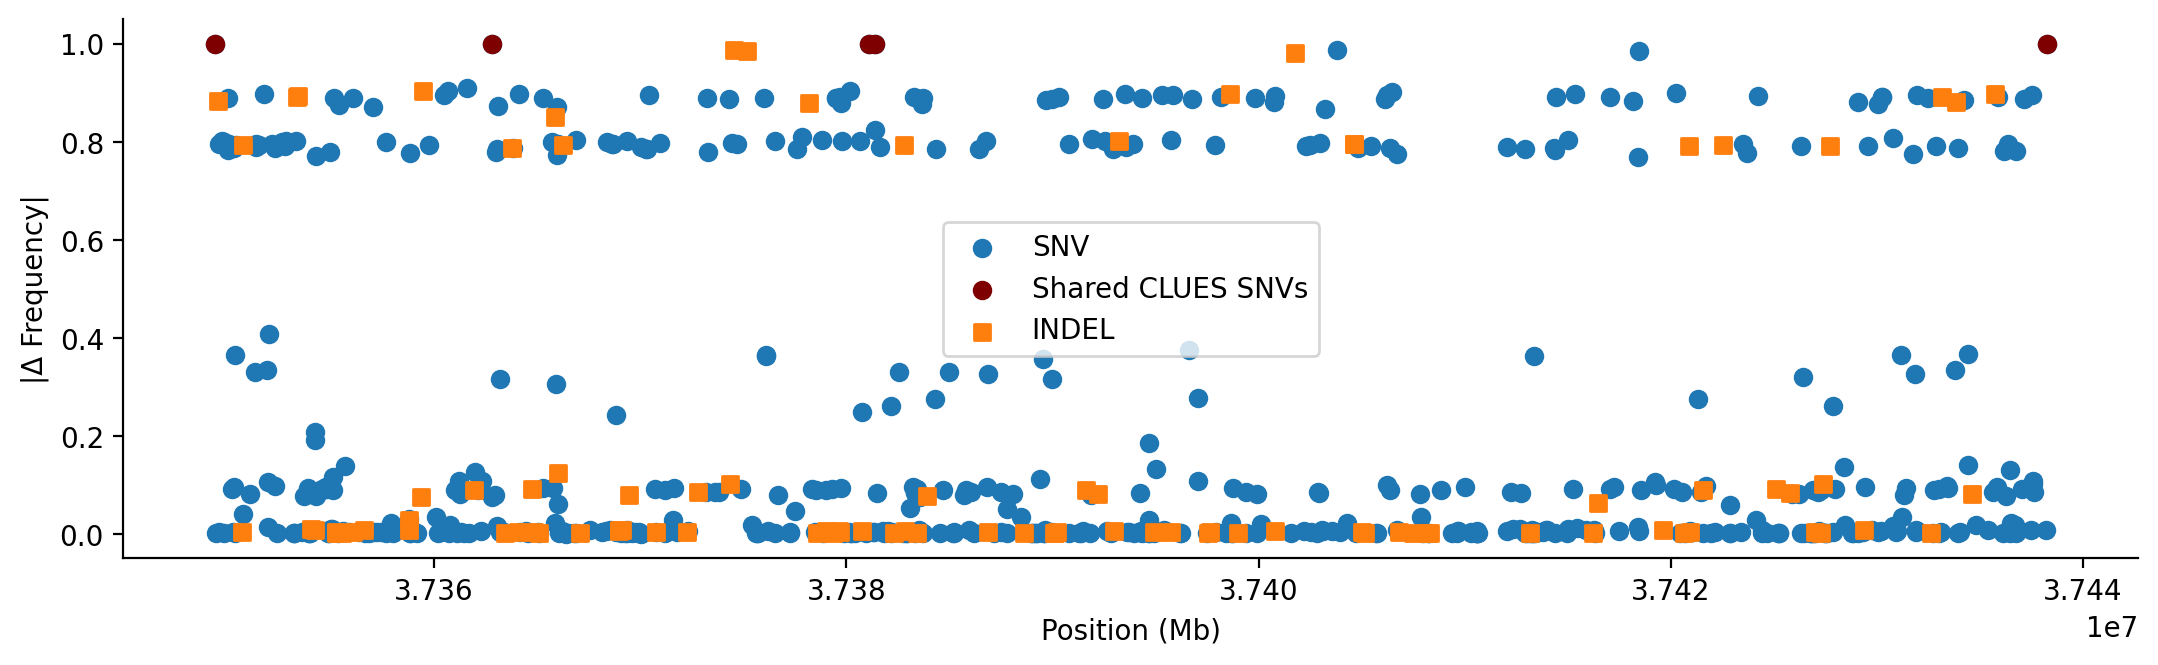

In [132]:
fig, ax = plt.subplots(figsize=(13, 3.5))
ax.scatter(df_diff_class.query('VARIANT_CLASS == "SNV"')['pos'], df_diff_class.query('VARIANT_CLASS == "SNV"')['freq_diff'], label='SNV')
ax.scatter(df_diff_class.query('pos in @ls_5_shared_snp')['pos'], df_diff_class.query('pos in @ls_5_shared_snp')['freq_diff'], label='Shared CLUES SNVs', c='#7f0000')
ax.scatter(df_diff_class.query('VARIANT_CLASS != "SNV"')['pos'], df_diff_class.query('VARIANT_CLASS != "SNV"')['freq_diff'], label='INDEL', marker='s')
ax.set_xlabel('Position (Mb)')
ax.set_ylabel('|Δ Frequency|')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()